This is a simple NLP project which predicts the sentiment of the movie reviews from IMDB dataset.

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import csv
import random


Gathering the Datasets and converting them to a single csv file

In [2]:
# Since all the reviews and sentiments are in txt file I have used this function to combine them and put them in an array
def txt_tocsv(path_of_files, arr, dir_list):
    for filename in dir_list:
        fpath = os.path.join(path_of_files, filename)
        with open(fpath, 'r', encoding="utf8") as file:
            arr.append(file.read())


In [3]:
# Converting the combined text file dataset to a dataframe using pandas
def arr_todf(dic, arr, data_f, rating):
    dic = {"review": arr,
           "rating": [rating]*len(arr)}
    data_f = pd.DataFrame(dic)
    print(data_f.head())
    return(data_f)


Converting the Positive training dataset to a csv file

In [4]:
pos_arr = []
path = r"datasets\train_pos.csv"
dir_list_pos = os.listdir(path)
txt_tocsv(path, pos_arr, dir_list_pos)


In [5]:
pos_dic = {}
pos_df = pd.DataFrame()
pos_df = arr_todf(pos_dic, pos_arr, pos_df, 1)


                                              review  rating
0  Bromwell High is a cartoon comedy. It ran at t...       1
1  Homelessness (or Houselessness as George Carli...       1
2  Brilliant over-acting by Lesley Ann Warren. Be...       1
3  This is easily the most underrated film inn th...       1
4  This is not the typical Mel Brooks film. It wa...       1


In [6]:
pos_df.to_csv("train_pos.csv", index=False)


Converting the negative training datasets to csv files

In [7]:
neg_arr = []
path = r"datasets\train_neg.csv"
dir_list_neg = os.listdir(path)
txt_tocsv(path, neg_arr, dir_list_neg)


In [8]:
neg_dic = {}
neg_df = pd.DataFrame()
neg_df = arr_todf(neg_dic, neg_arr, neg_df, 0)


                                              review  rating
0  Story of a man who has unnatural feelings for ...       0
1  Airport '77 starts as a brand new luxury 747 p...       0
2  This film lacked something I couldn't put my f...       0
3  Sorry everyone,,, I know this is supposed to b...       0
4  When I was little my parents took me along to ...       0


In [9]:
neg_df.to_csv("train_neg.csv", index=False)


Merging both the training dataset

In [10]:
pos_rev = pd.read_csv("train_pos.csv")
neg_rev = pd.read_csv("train_neg.csv")

training_data = pd.concat([pos_rev, neg_rev])
training_df = pd.DataFrame(training_data)
training_df = training_df.sample(frac=1)
training_df.head(10)
training_df.to_csv("training_data.csv", index=False)


Test data

Converting all the Positive Test Data to csv file

In [11]:

path = r'datasets\test_pos.csv'
dir_list_pos_test = os.listdir(path)
pos_arr_test = []

txt_tocsv(path, pos_arr_test, dir_list_pos_test)


In [12]:
pos_dic_test = {}
pos_df_test = pd.DataFrame()
pos_df_test = arr_todf(pos_dic_test, pos_arr_test, pos_df_test, 1)


                                              review  rating
0  I went and saw this movie last night after bei...       1
1  Actor turned director Bill Paxton follows up h...       1
2  As a recreational golfer with some knowledge o...       1
3  I saw this film in a sneak preview, and it is ...       1
4  Bill Paxton has taken the true story of the 19...       1


In [13]:
pos_df_test.to_csv("test_pos.csv", index=False)


Converting all the negative test data to csv file

In [14]:
path = r"datasets\test_neg.csv"
dir_list_neg_test = os.listdir(path)
neg_arr_test = []

txt_tocsv(path, neg_arr_test, dir_list_neg_test)


In [15]:
neg_dic_test = {}
neg_df_test = pd.DataFrame()
neg_df_test = arr_todf(neg_dic_test, neg_arr_test, neg_df_test, 0)


                                              review  rating
0  Once again Mr. Costner has dragged out a movie...       0
1  This is an example of why the majority of acti...       0
2  First of all I hate those moronic rappers, who...       0
3  Not even the Beatles could write songs everyon...       0
4  Brass pictures (movies is not a fitting word f...       0


In [16]:
neg_df_test.to_csv("test_neg.csv", index=False)


In [17]:
pos_rev_test = pd.read_csv("test_pos.csv")
neg_rev_test = pd.read_csv("test_neg.csv")

test_data = pd.concat([pos_rev_test, neg_rev_test])
testing_df = pd.DataFrame(test_data)
testing_df = testing_df.sample(frac=1)
testing_df.head(10)
testing_df.to_csv("testing_data.csv", index=False)


Merging both the training and testing dataset to get the full dataset

In [18]:
train_csv = pd.read_csv("training_data.csv")
test_csv = pd.read_csv("testing_data.csv")

dataset = pd.concat([train_csv, test_csv])
dataset_df = pd.DataFrame(dataset)
dataset_df = dataset_df.sample(frac=1)
dataset_df.head()
dataset_df.to_csv("imdb_dataset.csv", index=False)


In [19]:
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re
import string
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings


This part deals with data cleaning and model training 

In [20]:
# importing the csv file to a dataframe
df_imdb_train = pd.read_csv('imdb_dataset.csv')
df_imdb_train = df_imdb_train.sample(frac=1)
# df_imdb_train.head(20)
df_imdb_train.shape


(50000, 2)

In [21]:
df_imdb_train.describe()


,rating
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [22]:
df_imdb_train['rating'].value_counts()


1    25000
0    25000
Name: rating, dtype: int64

In [23]:
# tokenization
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')


Data cleaning 

In [24]:
# removing the html strips
def html_rem(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# removing the brackets


def brac_rem(text):
    return re.sub('\[[^]]*\]', '', text)


def denoise_txt(text):
    '''removing the noisy text'''
    text = html_rem(text)
    text = brac_rem(text)
    return text


df_imdb_train['review'] = df_imdb_train['review'].apply(denoise_txt)


In [25]:
def rem_spe_char(text, rem_dig=True):
    '''removing the special character'''
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text


df_imdb_train['review'] = df_imdb_train['review'].apply(rem_spe_char)


In [26]:
def simple_stemmer(text):
    '''eliminates the affixes from words in order to retrieve the base form'''
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


df_imdb_train['review'] = df_imdb_train['review'].apply(simple_stemmer)


In [27]:
stop_words = set(stopwords.words('english'))
print(stop_words)


def rem_stop_words(text, is_lower_case=False):
    '''removes all the words that have little or no meaning'''
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip()for token in tokens]
    if is_lower_case:
        filter_tokens = [
            token for token in tokens if token not in stopword_list]
    else:
        filter_tokens = [
            token for token in tokens if token.lower() not in stopword_list]

    filtered_text = ' '.join(filter_tokens)
    return filtered_text


df_imdb_train['review'] = df_imdb_train['review'].apply(rem_stop_words)


{'ain', 'than', 'then', 'him', 'its', 'by', 'm', 'only', 'have', 'ourselves', 'needn', 'herself', 'up', 'are', 'being', 'was', 'when', 'this', 'below', "hadn't", 'nor', 'yourselves', 'and', "you'll", 'had', "hasn't", "needn't", 'above', 'itself', 't', 'they', 'their', 'mustn', 'more', "isn't", 'it', 'mightn', 'don', 'having', 'just', 'o', "wouldn't", 'some', 'if', 'or', 'didn', "weren't", 'yours', 'same', 'down', 'after', 'such', 'shan', 'doing', 'd', 'won', 'y', 'with', 'between', 'hers', 'who', 'each', "mightn't", 'she', "that'll", 'ours', 'any', 'haven', 'in', 'very', "couldn't", 'what', 'during', 'do', 'how', 'them', 'myself', 'all', "she's", 'against', 'once', 'her', 'so', 'yourself', 're', "won't", 'himself', 'other', 'my', 'while', 'he', "should've", 'now', 'which', "didn't", 'doesn', 'been', 'ma', 'shouldn', "you're", 'at', 'should', 'that', 'on', 'couldn', "wasn't", "shouldn't", 'a', 'where', 'isn', 'you', 'did', 'aren', 'before', 'further', 'our', "haven't", 'will', 'i', 'own

In [28]:
norm_train_rev = df_imdb_train.review[:40000]
norm_train_rev[0]


'animatrix detect stori veri well plan ha great storylin go carrieann moss play triniti thi anim cartoon realli like privat detect idea creat director'

In [29]:
norm_test_rev = df_imdb_train.review[40000:]
# norm_test_rev.count()


Bag of word model

In [30]:
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1, 3))
cv_train_rev = cv.fit_transform(norm_train_rev)
cv_test_rev = cv.transform(norm_test_rev)

print("Bag of words for training dataset:", cv_train_rev.shape)
print("Bag of words of test dataset:", cv_test_rev.shape)


Bag of words for training dataset: (40000, 6212460)
Bag of words of test dataset: (10000, 6212460)


TFIDF model

In [31]:
tf = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1, 3))
tf_train_rev = tf.fit_transform(norm_train_rev)
tf_test_rev = tf.transform(norm_test_rev)

print("TFIDF of training dataset:", tf_train_rev.shape)
print("TFIDF test data:", tf_test_rev.shape)


TFIDF of training dataset: (40000, 6212460)
TFIDF test data: (10000, 6212460)


In [32]:
lb = LabelBinarizer()

rating_data = lb.fit_transform(df_imdb_train['rating'])

train_rating = rating_data[:40000]
test_rating = rating_data[40000:]
print(train_rating)
print(test_rating)


[[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


Modelling the data(multinomial naive bayes)

In [33]:
mnb = MultinomialNB()
# bag of words
mnb_bow = mnb.fit(cv_train_rev, np.ravel(train_rating))
print(mnb_bow)
# tfidf
mnb_tfidf = mnb.fit(tf_train_rev, np.ravel(train_rating))
print(mnb_tfidf)


MultinomialNB()
MultinomialNB()


In [34]:
mb_bow_predict = mnb.predict(cv_test_rev)
print(mb_bow_predict)

mb_tfidf_predict = mnb.predict(tf_test_rev)
print(mb_tfidf_predict)


[0 1 0 ... 1 1 0]
[0 1 0 ... 1 1 0]


In [35]:
mb_bow_acc = accuracy_score(test_rating, mb_bow_predict)
print(mb_bow_acc)

mb_tfidf_acc = accuracy_score(test_rating, mb_tfidf_predict)
print(mb_tfidf_acc)


0.7498
0.751


In [36]:
mb_bow_report = classification_report(
    test_rating, mb_bow_predict, target_names=['Positive', 'Negative'])
print(mb_bow_report)

mb_tfidf_report = classification_report(
    test_rating, mb_tfidf_predict, target_names=['Positive', 'Negative'])
print(mb_tfidf_report)


              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      5016
    Negative       0.75      0.75      0.75      4984

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.76      0.74      0.75      5016
    Negative       0.75      0.76      0.75      4984

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [37]:
cm_bow = confusion_matrix(test_rating, mb_bow_predict, labels=[1, 0])
print(cm_bow)


[[3744 1240]
 [1262 3754]]


<AxesSubplot:>

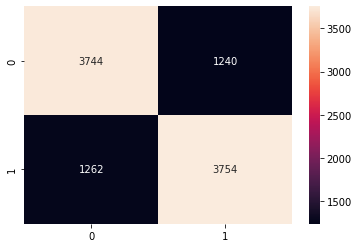

In [38]:
cm = pd.DataFrame(cm_bow)
sns.heatmap(cm, annot=True, fmt="d")


In [39]:
cm_tfidf = confusion_matrix(test_rating, mb_tfidf_predict, labels=[1, 0])
print(cm_tfidf)


[[3775 1209]
 [1281 3735]]


<AxesSubplot:>

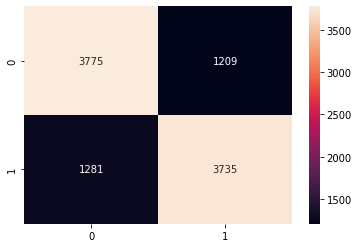

In [42]:
cm_t=pd.DataFrame(cm_tfidf)
sns.heatmap(cm_t,annot=True,fmt="d")

In [40]:
predict = mnb.predict(cv.transform(["When you make a film with a killer-kids premise, there are two effective ways to approach it; you can either make it as realistic as possible, creating believable characters and situations, or you can make it as fun as possible by playing it for laughs (something which the makers of Silent Night, Deadly Night did, for example, on an equally controversial subject: a killer Santa). The people who made Bloody Birthday, however, do neither of those things; they simply rely on the shock value of the image of a kid with a gun (or a knife, or a noose, or an arrow) in his/her hand. The result is both offensive and stupid. The whole film looks like a bad idea that was rushed through production (and then kept from release for several years). It's redeemed a tiny bit by good performances from the kids, but it's VERY sloppily made. (*1/2)"]))
if predict == 1:
    print("The sentiment is positive")
else:
    print("The sentiment is negative")


The sentiment is negative


In [41]:
predict = mnb.predict(cv.transform(["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater(which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."]))
if predict == 1:
    print("The sentiment is positive")
else:
    print("The sentiment is negative")


The sentiment is positive
